# Explore here

In [332]:
import pandas as pd


In [333]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

data = pd.read_csv(url, sep=";")



In [334]:
data = data.drop_duplicates().reset_index(drop = True)

In [335]:
data["job"] = pd.factorize(data["job"])[0]
data["marital"] = pd.factorize(data["marital"])[0]
data["education"] = pd.factorize(data["education"])[0]
data["default"] = pd.factorize(data["default"])[0]
data["housing"] = pd.factorize(data["housing"])[0]
data["loan"] = pd.factorize(data["loan"])[0]
data["contact"] = pd.factorize(data["contact"])[0]
data["month"] = pd.factorize(data["month"])[0]
data["day_of_week"] = pd.factorize(data["day_of_week"])[0]
data["poutcome"] = pd.factorize(data["poutcome"])[0]
data["y"] = pd.factorize(data["y"])[0]

In [336]:
num_variables = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "age", "duration", 
                 "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

In [337]:
X = data.drop("y", axis = 1)
y = data["y"]

In [338]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=num_variables)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=num_variables)


In [340]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(x_train_scaled, y_train)
ix = selection_model.get_support()
x_train_sel = pd.DataFrame(selection_model.transform(x_train_scaled), columns = x_train_scaled.columns.values[ix])
x_test_sel = pd.DataFrame(selection_model.transform(x_test_scaled), columns = x_test_scaled.columns.values[ix])

In [341]:
x_train_sel["y"] = list(y_train)
x_test_sel["y"] = list(y_test)


In [342]:
x_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
x_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [343]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

In [344]:
x_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]

x_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

In [345]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [346]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], shape=(12353,))

In [347]:
from sklearn.metrics import accuracy_score

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.9063385412450417

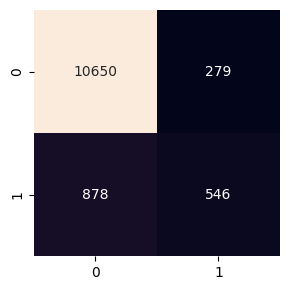

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [349]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [350]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000),
                   n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [351]:
random_search.fit(x_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(1.623776739188721)}


In [352]:
model_random_search = LogisticRegression(penalty = "l2", C = 1.623776739188721, solver = "saga")
model_random_search.fit(x_train, y_train)
y_pred = model_random_search.predict(x_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.9063385412450417

In [353]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [355]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(x_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [356]:
model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "lbfgs")
model_grid.fit(x_train, y_train)
y_pred = model_grid.predict(x_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9063385412450417